In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

num_questions = 4
question_columns = [f"Q{i}" for i in range(1, num_questions + 1)]
total_participants = 100

def generate_random_data():
    data = []

    for participant_id in range(total_participants):
        answers = [random.randint(1, 5) for _ in range(num_questions)]
        
        group = 0
        if random.random() > 0.5 and answers[0] + answers[1] > 6:
            group = 1
        
        data.append([participant_id, group] + answers)

    columns = ["Participant_ID", "Group"] + question_columns
    return pd.DataFrame(data, columns=columns)

df = generate_random_data()
df.head()

,Participant_ID,Group,Q1,Q2,Q3,Q4
0,0,1,5,3,4,2
1,1,1,4,4,1,1
2,2,1,5,5,5,3
3,3,0,5,4,3,5
4,4,0,3,4,1,1


In [2]:
df.Group.value_counts()

0 78
1 22
Name: Group, dtype: int64

In [3]:
df_long = pd.melt(df, id_vars=["Group"], value_vars=question_columns)
df_long.head()

,Group,variable,value
0,1,Q1,5
1,1,Q1,4
2,1,Q1,5
3,0,Q1,5
4,0,Q1,3


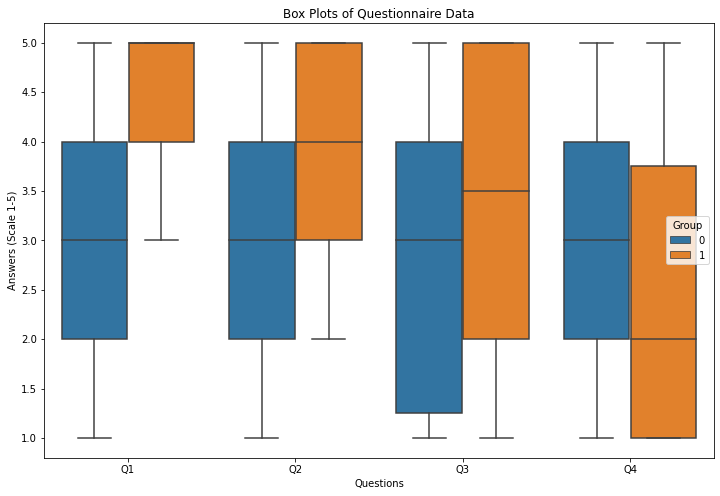

In [4]:
# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="Group", data=df_long)
plt.title("Box Plots of Questionnaire Data")
plt.xlabel("Questions")
plt.ylabel("Answers (Scale 1-5)")
plt.show()

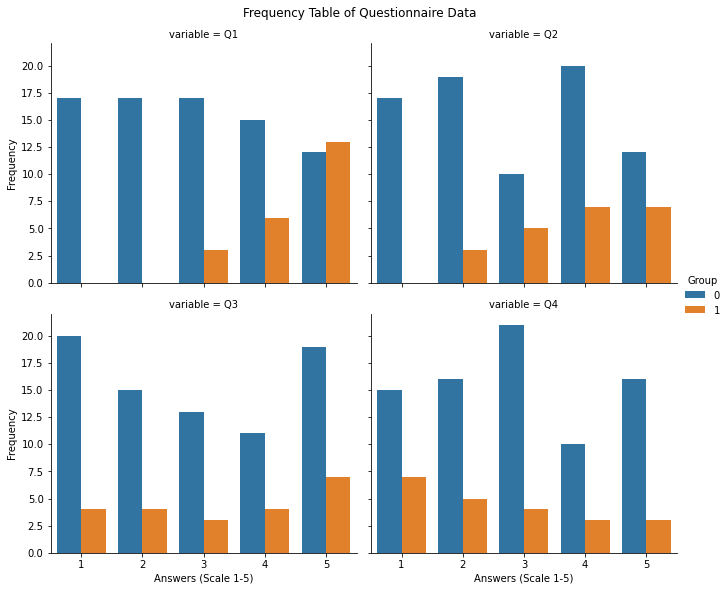

In [5]:
# Create separate count plots for each question
g = sns.catplot(x="value", hue="Group", col="variable", col_wrap=2, data=df_long, kind="count", height=4, aspect=1.2)
g.set_axis_labels("Answers (Scale 1-5)", "Frequency")
g.fig.suptitle("Frequency Table of Questionnaire Data", y=1.02)
plt.show()

In [6]:
group_1_data = df[df['Group'] == 0]
group_2_data = df[df['Group'] == 1]

# Perform Mann-Whitney U test for each question
test_results = {}
for column in df.columns[2:]:
    test_results[column] = mannwhitneyu(group_1_data[column], group_2_data[column], alternative='two-sided')

apa_string_0 = "A Mann-Whitney U test was performed to evaluate whether:"
apa_string_1 = "answers to Q1, 2, 3, and 4 differed between the groups 0 and 1."
apa_string_2 = "The results indicated (1) that there was [no significant] difference for Q3 and 4."
apa_string_3 = "The results indicated (2) that there was [a significant!] difference for Q1 and 2."

print(apa_string_0)
print(apa_string_1)
print(apa_string_2)
print(apa_string_3)
print(" -- ")

# Display p-values
print("Mann-Whitney U Test P-Values:")
for question, (u_stat, p) in test_results.items():
    print(f"{question}: U = {u_stat:.2f}, p = {p:.4f}, significant: {p < 0.05}")

A Mann-Whitney U test was performed to evaluate whether:
answers to Q1, 2, 3, and 4 differed between the groups 0 and 1.
The results indicated (1) that there was [no significant] difference for Q3 and 4.
The results indicated (2) that there was [a significant!] difference for Q1 and 2.
 -- 
Mann-Whitney U Test P-Values:
Q1: U = 301.50, p = 0.0000, significant: True
Q2: U = 535.50, p = 0.0061, significant: True
Q3: U = 748.00, p = 0.3510, significant: False
Q4: U = 1001.50, p = 0.2235, significant: False
